# Unit 1: Vectors, Matrices, Inverses, and Determinants

In this unit:
1. Vectors
1. Operations with vectors
1. Dot product
1. Norms
1. Matrices
1. Operations with matrices
1. Special matrices
1. Transpose
1. Inverses 
1. Determinants
1. Gradient vectors


### Dimension (length) of a vector

In [1]:
v1 = [1] #scalar
v2 = [1,2] #in the plane
v3 = [1,2,3] # in space
v4 = [1,2,3,4] #higher diemension
println("Length of v3 = ", length(v3))
length.([v1,v2,v3,v4])

Length of v3 = 3


4-element Array{Int64,1}:
 1
 2
 3
 4

### Linear combintations of vectors

$$\alpha_1 v_1 + \alpha_2 v_2$$

In [2]:
v1 = [1,2,3]
v2 = [4,5,6]
α1 = 2
α2 = -1
α1*v1+α2*v2

3-element Array{Int64,1}:
 -2
 -1
  0

### Dot products

$$
u \cdot v = u^{T} v = \sum_{i=1}^n u_k v_k
$$

In [3]:
using LinearAlgebra
n = length(v1)
n == length(v2) || @error "Vectors must be of same length"
v1'*v2, dot(v1,v2), v1 ⋅ v2, sum([v1[k]*v2[k] for k in 1:n]) #get ⋅ using \cdot +[TAB]

(32, 32, 32, 32)

### Norms

$$
||u|| = \sqrt{u^Tu}
$$

In [4]:
norm(v1),norm(v1,2),sqrt(v1'*v1) 

(3.7416573867739413, 3.7416573867739413, 3.7416573867739413)

In [5]:
norm(-v1)

3.7416573867739413

In [6]:
norm(v1,1),norm(-v1,1) #The L_1 norm

(6.0, 6.0)

$||u + v||^2 = ||u||^2 + 2u^Tv + ||v||^2$

$||u|| \ge 0$

$||\gamma u || = |\gamma|~||u||$

$||u|| = 0$ only if $u = 0$.

### Normalizing a vector

In [7]:
normVect(v) = v1/norm(v1)
vn = normVect(v1)
println("Norm of normed vec: ", norm(vn))
vn

Norm of normed vec: 1.0


3-element Array{Float64,1}:
 0.2672612419124244
 0.5345224838248488
 0.8017837257372732

### Angle between two vectors

$$
\angle(u,v) = \arccos \Big( \frac{u^T v}{||u|| ||v||} \Big)
$$

In [13]:
u = [10,0]
v = [-5, 5]
θ = acos((u ⋅ v)/norm(u)/norm(v))
rad2deg(θ)

135.0

In [8]:
# Don't confuse with angle of a complex number
? angle

search: angle StepRangeLen UpperTriangular LowerTriangular UnitUpperTriangular



```
angle(z)
```

Compute the phase angle in radians of a complex number `z`.

# Examples

```jldoctest
julia> rad2deg(angle(1 + im))
45.0

julia> rad2deg(angle(1 - im))
-45.0

julia> rad2deg(angle(-1 - im))
-135.0
```


Sometimes we speak about $\cos \theta$:

$$
\cos \theta = \frac{u^T v}{||u|| ||v||}
$$

In [20]:
u = [10,0]
v = [5, 5]
θ = (u ⋅ v)/norm(u)/norm(v)
θ, rad2deg(θ),sqrt(2)/2

(0.7071067811865475, 40.51423422706977, 0.7071067811865476)

### Cauchy-Schwarz, Inequality

$$
|u^T v| \le ||u|| ~ ||v||
$$

Proof (essense):  Assume $u \neq 0$ and $v \neq 0$. Set $\alpha := ||u||$, $\beta := ||v||$:

$$
0 \le || \alpha u - \beta v||^2 = \ldots \ldots = 2 ||u||^2 ||v||^2 - 2 ||u||~||v|| (u^T v)
$$

Hence,

$$
u^T v \le ||u||~||v||
$$

Now repeat with $-u$ and $v$.

### Triangle Inequality

$$||u + v|| \le ||u|| + ||v||$$

Proof:

$$ ||u+v||^2 = ||u||^2 + 2u^T v + ||v||^2 \le ||u||^2 + 2 ||u|| ~ ||v|| + ||v||^2 = \big( ||u|| + ||v|| \big)^2$$

In [24]:
n = 10
N = 10^4
arr1 = []
for _ in 1:N
    u = rand(n)
    v = rand(n)
    cs = norm(u)*norm(v)- abs(u ⋅ v) 
    push!(arr1,cs)
end
minimum(arr1)

0.04931183881353629

### Matrices

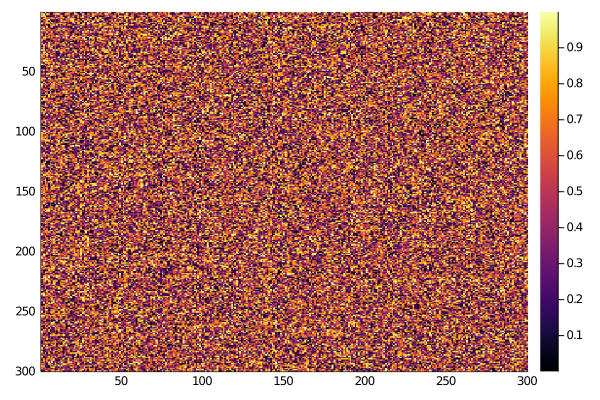

In [25]:
using Plots
heatmap(rand(300,300),yflip = true)

In [26]:
H = [i == j+4 || i == j-2 for i in 1:10, j in 1:10]

10×10 Array{Bool,2}:
 0  0  1  0  0  0  0  0  0  0
 0  0  0  1  0  0  0  0  0  0
 0  0  0  0  1  0  0  0  0  0
 0  0  0  0  0  1  0  0  0  0
 1  0  0  0  0  0  1  0  0  0
 0  1  0  0  0  0  0  1  0  0
 0  0  1  0  0  0  0  0  1  0
 0  0  0  1  0  0  0  0  0  1
 0  0  0  0  1  0  0  0  0  0
 0  0  0  0  0  1  0  0  0  0

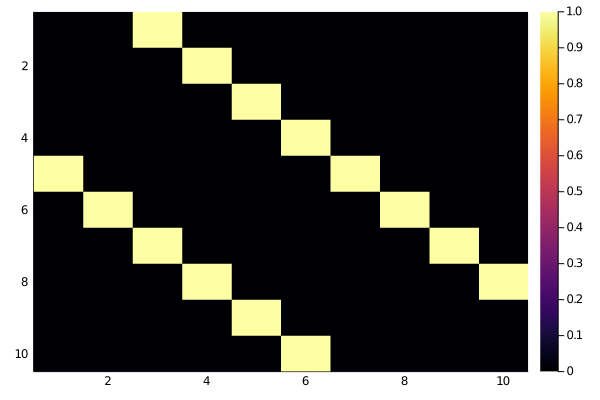

In [27]:
heatmap(H,yflip = true)

In [28]:
A = [1 2; 3 4] 
B = [-2 3; 1 3]
C = [0 1 2; -1 1 0]
display(A);display(B);display(C)

2×2 Array{Int64,2}:
 1  2
 3  4

2×2 Array{Int64,2}:
 -2  3
  1  3

2×3 Array{Int64,2}:
  0  1  2
 -1  1  0

In [29]:
A+B

2×2 Array{Int64,2}:
 -1  5
  4  7

In [30]:
3*A

2×2 Array{Int64,2}:
 3   6
 9  12

In [31]:
2A+B

2×2 Array{Int64,2}:
 0   7
 7  11

In [32]:
A+C

DimensionMismatch: DimensionMismatch("dimensions must match: a has dims (Base.OneTo(2), Base.OneTo(2)), b has dims (Base.OneTo(2), Base.OneTo(3)), mismatch at 2")

### Matrix Multiplication

Four ways: 

* Dot product
* Cols
* Rows
* Outer product

In [34]:
A*B

2×2 Array{Int64,2}:
  0   9
 -2  21

In [35]:
B*A

2×2 Array{Int64,2}:
  7   8
 10  14

In [36]:
""" 
My own matrix multiplication function 
"""
function myMatMult(A,B)
    n,m = size(A)
    p,q = size(B)
    if m != q
        @error "Size mismatch"
    end
    C = zeros(n,q)
    for i in 1:n
        for j in 1:q
            C[i,j] = dot(A[i,:],B[:,j])
        end
    end
    C
end

myMatMult

In [37]:
? myMatMult

search: myMatMult



My own matrix multiplication function 


In [38]:
myMatMult(A,B)

2×2 Array{Float64,2}:
  0.0   9.0
 -2.0  21.0

In [43]:
using Random
Random.seed!(0)
A = rand(100,100)
@time begin
    for _ in 1:1000
        global A = A*rand(100,100)
    end
end

  0.213633 seconds (4.00 k allocations: 152.740 MiB, 19.34% gc time)


In [46]:
Random.seed!(0)
A = rand(100,100)
@time begin
    for _ in 1:100
        global A = myMatMult(A,rand(100,100))
    end
end

  0.610709 seconds (2.00 M allocations: 1.684 GiB, 27.53% gc time)


### Identity Matrix

In [47]:
I

UniformScaling{Bool}
true*I

In [51]:
A = [1 2; 3 4] 

2×2 Array{Int64,2}:
 1  2
 3  4

In [52]:
A*I .== A

2×2 BitArray{2}:
 1  1
 1  1

In [53]:
I*A

2×2 Array{Int64,2}:
 1  2
 3  4

### Inverses

$$A^{-1} A = I, 
\qquad
A A^{-1} = I$$

In [54]:
Ai = inv(A)

2×2 Array{Float64,2}:
 -2.0   1.0
  1.5  -0.5

In [55]:
Ai*A

2×2 Array{Float64,2}:
 1.0          0.0
 2.22045e-16  1.0

In [56]:
A*Ai

2×2 Array{Float64,2}:
 1.0          0.0
 8.88178e-16  1.0

$$
(AB)^{-1} = B^{-1}A^{-1}
$$

In [57]:
A = [1 2; 3 4];
B = [5 6; 7 8]
inv(A*B)

2×2 Array{Float64,2}:
  12.5   -5.5
 -10.75   4.75

In [58]:
inv(B)*inv(A)

2×2 Array{Float64,2}:
  12.5   -5.5
 -10.75   4.75

### Transpose

In [67]:
A = [j+3(i-1) for i in 1:3, j in 1:3]

3×3 Array{Int64,2}:
 1  2  3
 4  5  6
 7  8  9

In [68]:
A'

3×3 Adjoint{Int64,Array{Int64,2}}:
 1  4  7
 2  5  8
 3  6  9

A symmetric matrix has $A^T = A$

In [69]:
issymmetric(A)

false

In [73]:
S = (A'+A)/2
display(S)
issymmetric(S)

3×3 Array{Float64,2}:
 1.0  3.0  5.0
 3.0  5.0  7.0
 5.0  7.0  9.0

true

$$(A B)^T = B^T A^T$$

In [75]:
B = A .+ 3

3×3 Array{Int64,2}:
  4   5   6
  7   8   9
 10  11  12

In [78]:
display((A*B)')
display(B'*A')

3×3 Adjoint{Int64,Array{Int64,2}}:
 48  111  174
 54  126  198
 60  141  222

3×3 Array{Int64,2}:
 48  111  174
 54  126  198
 60  141  222

### Determinants

In [59]:
A = [1 2; 3 4]

2×2 Array{Int64,2}:
 1  2
 3  4

In [60]:
using LinearAlgebra
det(A), A[1,1]*A[2,2]-A[1,2]*A[2,1]

(-2.0, -2)

In [61]:
B = [ 1 2 3; 4 5 6]

2×3 Array{Int64,2}:
 1  2  3
 4  5  6

In [62]:
det(B)

DimensionMismatch: DimensionMismatch("matrix is not square: dimensions are (2, 3)")

In [63]:
function myDet(A)
    n, m = size(A)
    n == m || @error "Dimension mismatch"
    if n == 2
        return A[1,1]*A[2,2]-A[1,2]*A[2,1]
    else
        return sum([(-1)^(i+1)*A[1,i]*det(A[2:n,setdiff(1:n,i)])   for i in 1:n])
    end
end

myDet (generic function with 1 method)

In [42]:
A = rand(5,5)

5×5 Array{Float64,2}:
 0.411547  0.856212  0.77529    0.00774377  0.9056
 0.487703  0.361782  0.208092   0.940379    0.456911
 0.262204  0.490879  0.0390169  0.420601    0.626411
 0.207319  0.131707  0.286204   0.456596    0.155493
 0.824443  0.638328  0.290695   0.832459    0.168462

In [43]:
det(A)

-0.011605359687676266

In [44]:
myDet(A)

-0.011605359687676262

In [45]:
det(inv(A)),1/det(A)

(-86.16708373648252, -86.16708373648257)

$$|AB| =|A| |B|$$

In [55]:
A = [1 0;
    1 0]

2×2 Array{Int64,2}:
 1  0
 1  0

In [56]:
det(A)

0.0

In [57]:
inv(A)

LAPACKException: LAPACKException(2)

In [65]:
B = [1 2 3;
     4 5 6;
     5 7 9]

3×3 Array{Int64,2}:
 1  2  3
 4  5  6
 5  7  9

In [66]:
det(B)

2.664535259100378e-15

In [67]:
inv(B)

3×3 Array{Float64,2}:
  1.1259e15   1.1259e15  -1.1259e15
 -2.2518e15  -2.2518e15   2.2518e15
  1.1259e15   1.1259e15  -1.1259e15

In [70]:
cond(B)

1.3295683760909222e16

In [69]:
? cond

search: cond condskeel Condition macroexpand @macroexpand @macroexpand1



```
cond(M, p::Real=2)
```

Condition number of the matrix `M`, computed using the operator `p`-norm. Valid values for `p` are `1`, `2` (default), or `Inf`.


# Application: k-means

Taken from Listings 9.12 and 9.13 of [SWJ]:

In [82]:
using Pkg
Pkg.add("Clustering")

   Updating registry at `~/.juliapro/JuliaPro_v1.4.2-1/registries/JuliaPro`
######################################################################### 100.0%
  Resolving package versions...
  Installed Distances ──────── v0.9.0
  Installed DataStructures ─── v0.17.19
  Installed NearestNeighbors ─ v0.4.6
   Updating `~/Project.toml`
  [aaaa29a8] + Clustering v0.14.1
   Updating `~/Manifest.toml`
  [aaaa29a8] + Clustering v0.14.1
  [9a962f9c] + DataAPI v1.3.0
  [864edb3b] + DataStructures v0.17.19
  [b4f34e82] + Distances v0.9.0
  [e1d29d7a] + Missings v0.4.3
  [b8a86587] + NearestNeighbors v0.4.6
  [bac558e1] + OrderedCollections v1.3.0
  [a2af1166] + SortingAlgorithms v0.3.1
  [90137ffa] + StaticArrays v0.12.4
  [2913bbd2] + StatsBase v0.33.0


┌ Info: Precompiling Clustering [aaaa29a8-35af-508c-8bc3-b662a17a0fe5]
└ @ Base loading.jl:1260


Number of clusters: 3
Counts of clusters: [899, 1149, 952]


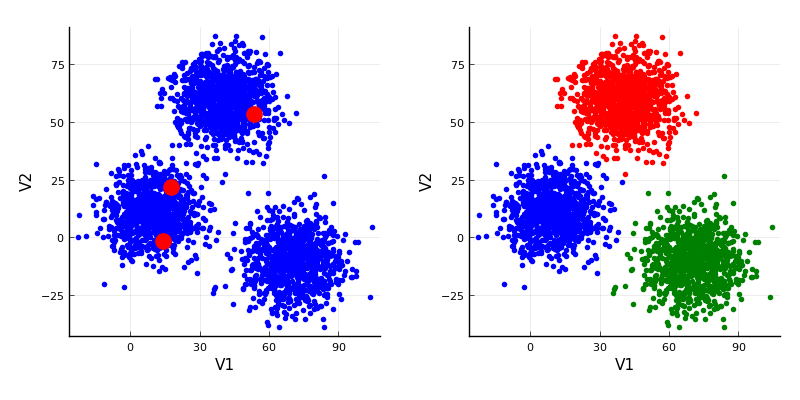

In [83]:
using Clustering, RDatasets, Random, Measures, Plots; pyplot()
Random.seed!(0)

K = 3
df = dataset("cluster", "xclara")
data = copy(convert(Array{Float64}, df)')

seeds = initseeds(:rand, data, K)
xclaraKmeans = kmeans(data, K, init = seeds)

println("Number of clusters: ", nclusters(xclaraKmeans))
println("Counts of clusters: ", counts(xclaraKmeans))

df.Group  = assignments(xclaraKmeans)

p1 = scatter(df[:, :V1], df[:, :V2], c=:blue, msw=0)
     scatter!(df[seeds, :V1], df[seeds, :V2], markersize=12, c=:red, msw=0)

p2 = scatter( df[df.Group .== 1, :V1], df[df.Group .== 1, :V2], c=:blue, msw=0)
     scatter!( df[df.Group .== 2, :V1], df[df.Group .== 2, :V2], c=:red, msw=0)
     scatter!( df[df.Group .== 3, :V1], df[df.Group .== 3, :V2], c=:green, msw=0)

plot(p1,p2,legend=:none,ratio=:equal,
    size=(800,400), xlabel="V1", ylabel="V2", margin = 5mm)

In [84]:
using RDatasets, Distributions, Random, LinearAlgebra
Random.seed!(0)

K = 3
df = dataset("cluster", "xclara")
n,_ = size(df)
dataPoints = [convert(Array{Float64,1},df[i,:]) for i in 1:n]
shuffle!(dataPoints)

xMin,xMax = minimum(first.(dataPoints)),maximum(first.(dataPoints))
yMin,yMax = minimum(last.(dataPoints)),maximum(last.(dataPoints))

means = [[rand(Uniform(xMin,xMax)),rand(Uniform(yMin,yMax))]  for _ in 1:K]
labels = rand(1:K,n)
prevMeans = -means

while norm(prevMeans - means) > 0.001
    prevMeans = means
    labels = [argmin([norm(means[i]-x) for i in 1:K]) for x in dataPoints]
    means = [sum(dataPoints[labels .== i])/sum(labels .==i) for i in 1:K]
end

cnts = [sum(labels .== i) for i in 1:K]
println("Counts of clusters (manual implementation): ", cnts)

Counts of clusters (manual implementation): [899, 1149, 952]
